## EXPLORATORY DATA ANALYSIS
#### AMY ZHANG
In this data story, I will be investigating happiness and relationships. An aspirational goal of the project is to narrow down to data concerning males and find some data to support the "[male loneliness epidemic](https://wou.edu/westernhowl/the-male-loneliness-epidemic/)". My original idea was to explore happiness (hello world happiness dataset), friendships, and close relationships in general, because of Gallup's finding that [life satisfaction is at at all-time low](https://news.gallup.com/poll/655493/new-low-satisfied-personal-life.aspx). but I was inspired by this article about [boys and friendships](https://melindawmoyer.substack.com/p/the-epidemic-of-male-loneliness) to look at interpersonal relationships and focus on connections rather than income or education, which are often studied.

Do men and women socialize differently? What are the differences in the different relationship styles? This [article] (https://melindawmoyer.substack.com/p/the-epidemic-of-male-loneliness) talks about the growing concern around whether boys and men confide in friends. 

### All the dataset cleaning and initial exploration is highlighted in this jupyter notebook. This is meant to be looked at alongside the streamlit file, which is the main story file. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### DATA
First, I have this world happiness data. I want the scope of this project to cover the U.S., because my other data mainly surveys people in the United States. To clean it, I'll drop NA values and filter it down to U.S. only. I also need to merge the 2005-2023 data with the 2024 data. 

In [3]:
# load it into a pd df
happiness_data_2005 = pd.read_csv('2005happiness.csv', encoding="ISO-8859-1")

In [4]:
happiness_data_2005.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [5]:
# I just want U.S. 
us_df = happiness_data_2005[happiness_data_2005["Country name"] == "United States"]
# name ladder column to match the other dataset: "ladder score"
df1 = us_df.rename(columns={"Life Ladder": "Ladder score"})
df1.head(20)

,Country name,year,Ladder score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2225,United States,2006,7.182,10.921,0.965,66.780,0.911,NaN,0.600,0.775,0.261
2226,United States,2007,7.513,10.931,NaN,66.760,0.872,0.191,0.633,0.756,0.232
2227,United States,2008,7.280,10.923,0.953,66.740,0.878,0.249,0.668,0.774,0.227
2228,United States,2009,7.158,10.888,0.912,66.720,0.831,0.195,0.665,0.753,0.262
2229,United States,2010,7.164,10.906,0.926,66.700,0.828,0.238,0.690,0.776,0.231
2230,United States,2011,7.115,10.914,0.922,66.680,0.863,0.155,0.697,0.737,0.273
2231,United States,2012,7.026,10.929,0.903,66.660,0.823,0.208,0.710,0.765,0.260
2232,United States,2013,7.249,10.941,0.925,66.640,0.792,0.268,0.747,0.776,0.260
2233,United States,2014,7.151,10.956,0.902,66.620,0.866,0.215,0.702,0.786,0.281
2234,United States,2015,6.864,10.975,0.904,66.600,0.849,0.213,0.698,0.769,0.275


In [6]:
# 2024 data
happiness_data_2024 = pd.read_csv('2024happiness.csv', encoding="ISO-8859-1")
happiness_data_2024.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [7]:
# U.S. ONLY
us_df_2024 = happiness_data_2024[happiness_data_2024["Country name"] == "United States"]
us_df_2024.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
22,United States,North America and ANZ,6.725,6.818,6.631,1.939,1.392,0.542,0.586,0.223,0.169,1.873


### Merging dataframes
Since I want to focus on interpersonal relationships and connections, I will focus on two measures in the datasets: Social support and the ladder score.
* The social support category points to " The national average of binary responses (either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble."
* The ladder score is "The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0"

ALL DESCRIPTIONS FROM [KAGGLE DATASET](https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated?resource=download&select=World-happiness-report-updated_2024.csv)

In [18]:
# merge dfs (to get 2006-2024)
df1_1 = df1[["year", "Ladder score", "Social support"]]
df2 = us_df_2024[["Ladder score", "Social support"]]

# Merge the two dataframes
full_df = pd.concat([df1_1, df2])
full_df["year"] = full_df["year"].fillna(2024)
# full_df.head(20)

# I want just the years 2010-2024, because the popular dating apps like Tinder and Hinge came out in 2012, so I want to see if there is
#  notable change before and after the apps came out

filter_df = full_df.loc[(full_df["year"] >= 2010) & (full_df["year"] <= 2024)]
filter_df.head(15)

,year,Ladder score,Social support
2229,2010.0,7.164,0.926
2230,2011.0,7.115,0.922
2231,2012.0,7.026,0.903
2232,2013.0,7.249,0.925
2233,2014.0,7.151,0.902
2234,2015.0,6.864,0.904
2235,2016.0,6.804,0.897
2236,2017.0,6.992,0.921
2237,2018.0,6.883,0.904
2238,2019.0,6.944,0.917


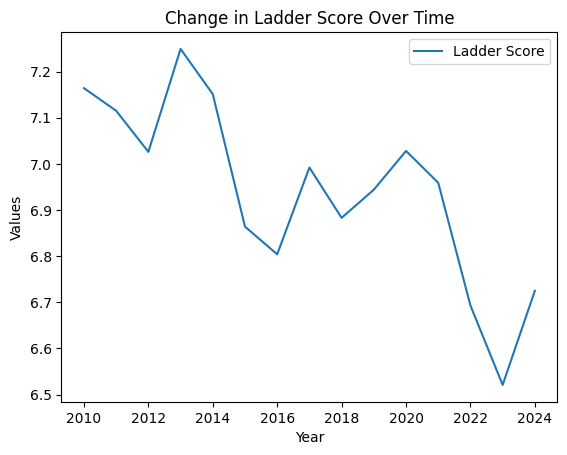

In [19]:
# let's get started on visualizing the data. I'll make a simple line graph to show the change in these two variables over the years
ladder_plot= plt.plot(filter_df["year"], filter_df["Ladder score"], label="Ladder Score")

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Change in Ladder Score Over Time")

# Show legend
plt.legend()

# Show plot
plt.show()

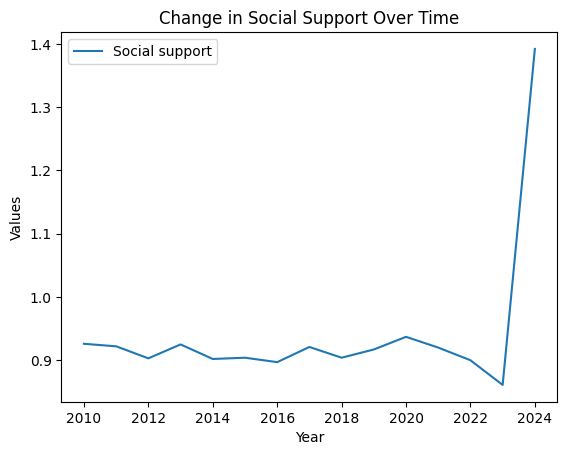

In [20]:
plt.plot(filter_df["year"], filter_df["Social support"], label="Social support")

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Change in Social Support Over Time")

# Show legend
plt.legend()

# Show plot
plt.show()

In [21]:
# I'm going to load in the satisfaction data now
satisfaction_data = pd.read_csv('Personal_Life_Satisfaction.csv')
#satisfaction_data.head()
print(satisfaction_data)


    In general, are you satisfied or dissatisfied with the way things are going in your personal life at this time?<br>Are you very [satisfied/dissatisfied], or just somewhat [satisfied/dissatisfied]?  \
0                                                2001                                                                                                                                                      
1                                                2002                                                                                                                                                      
2                                                2003                                                                                                                                                      
3                                                2004                                                                                                                                   

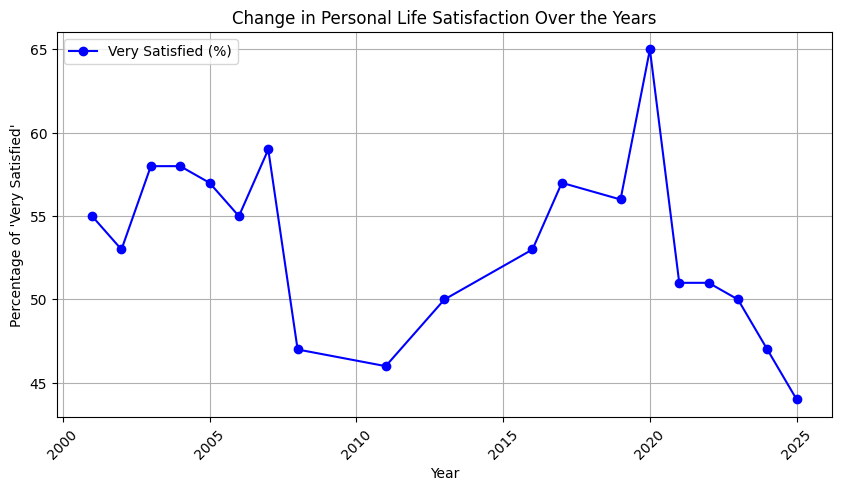

In [22]:
satisfaction_data.columns = ["Year", "Very Satisfied (%)"]

# the dataset was weirdly formatted, so I had to clean it up
satisfaction_data["Year"] = satisfaction_data["Year"].astype(int)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(satisfaction_data["Year"], satisfaction_data["Very Satisfied (%)"], marker='o', linestyle='-', color='b', label="Very Satisfied (%)")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Percentage of 'Very Satisfied'")
plt.title("Change in Personal Life Satisfaction Over the Years")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show plot
plt.show()

I'm seeing that life satisfaction is at an all-time low this year. It peaked in 2020, which is interesting considering the pandemic. I can also see that the percentage of people who are 'very satisfied' has been steadily dropping since then. However, it is worthy to keep in mind that just because people are not "very satisfied" with their lives, does not mean they are deeply unhappy. [Gallup's poll](https://news.gallup.com/poll/655493/new-low-satisfied-personal-life.aspx) revealed that another 37% of Americans today say they are “somewhat satisfied” with their personal life, while 9% are “somewhat” dissatisfied and 8% are “very” dissatisfied.

## Overall conclusions from this 
From analyzing the World Happiness Survey and Gallup's annual Mood of the Nation poll, I can see that generally, peoples' satisfaction levels have been decreasing over the years. The next logical step would be to look into the factors I originally set out to look for to see what I can attribute this decline to. 

## Questions
I want to try to answer this series of questions that relate to my original research question. 

* Is there a measurable gender difference in reported loneliness and life satisfaction?
* How have relationship styles and socialization patterns changed over time for men and women?
* What role do dating apps play in social connection, and do they correlate with lower life satisfaction?
* Are shifts in marriage rates, friendships, and personal relationships indicators of male loneliness?
* How do external factors like cultural expectations, economic conditions, and the pandemic contribute to male loneliness?


## Pitfall
The data I wanted to look at (General Social Survey Data, American Time Survey Data) did not have data in formats that were recent yet (recent being even 2021 and 2022). I also did not find any publically available datasets about dating sites. 

"What did you expect to find, what wasn’t there? 
How did what you DID find change your thinking about the data?
How will the realities of the data be foundational to your visualization? "

These are questions from the assignment document that I will now answer. I expected to find really definable, gendered data that was RECENT that would lead me right to my answer. Alas, that did not really happen. Although there are reports out from centers like Pew Research and Gallup about men, women, and dating and socialization, this data was not publically available or in a format that I could wrangle, clean, and analyze. Even through searching on Kaggle which has mostly clean datasets from other people, I did not find anything recent- the best I could find was edited 10 years ago. The realities of the data show me that I need to narrow the scope of my question. I need to see how men and women socialize differently, and I will focus on friends, time spent with friends, and a little bit about romantic involvement. 

## Decision
I will use reports that are available. I found a feature of the General Social Survey (GSS) that allows me to choose variables then tabulate them multivariably or cross-tabulate. In this stage, I'm just going to select by year from 2010 to 2022 and use relevant variables like socialization with friends and community for columns and sex (M/F) for the rows.

Also, I've noticed that some data does not really take non-binary people into account and simply uses "sex" as Male or Female. Very binary terms, which could exclude some people. But, my question is pretty binary, and so is the whole "male loneliness" characterization that I am investigating anyway. These are things to think about. 

## Another pitfall
This process was arduous, surprisingly so. I had to get creative to get this data to be usable for the purposes of this project. In the screenshot here, you can see my cross-tabulation data was not exported correctly into excel, which I could not figure out for the life of me. So next, I decided I would take the data and manually insert it into a dataframe so I can create visualizations. I'm just going to use variables like socialization with friends, number of friends, number of times they call or visit friends, etc. in the GSS survey to determine socialization levels and directly compare how men and women behave within each socialization category.

In [30]:
# data for spending an evening with friends
data = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "ALMOST DAILY": ["860", "668", "1528"],
    "SEV TIMES A WEEK": ["3941", "3967", "7908"],
    "SEV TIMES A MNTH": ["3988", "4562", "8551"],
    "ONCE A MONTH": ["4369", "5037", "9406"],
    "SEV TIMES A YEAR": ["4079", "4106", "8186"],
    "ONCE A YEAR": ["1642", "1628", "3270"],
    "NEVER": ["1813", "2434", "4247"],
    "Total": ["20693", "22403", "43096"]
}

crosstab_evening_socialization = pd.DataFrame(data)

crosstab_evening_socialization.head()

,SEX (respondents sex),ALMOST DAILY,SEV TIMES A WEEK,SEV TIMES A MNTH,ONCE A MONTH,SEV TIMES A YEAR,ONCE A YEAR,NEVER,Total
0,MALE,860,3941,3988,4369,4079,1642,1813,20693
1,FEMALE,668,3967,4562,5037,4106,1628,2434,22403
2,Total,1528,7908,8551,9406,8186,3270,4247,43096


In [31]:
# data for spending an evening at a bar
data = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "ALMOST DAILY": [386, 101, 487],
    "SEV TIMES A WEEK": [2118, 1050, 3168],
    "SEV TIMES A MNTH": [1866, 1361, 3227],
    "ONCE A MONTH": [2361, 2088, 4449],
    "SEV TIMES A YEAR": [2671, 2747, 5418],
    "ONCE A YEAR": [2495, 2718, 5214],
    "NEVER": [8766, 12328, 21094],
    "Total": [20663, 22394, 43057]
}

df_socbar = pd.DataFrame(data)

df_socbar.head()

,SEX (respondents sex),ALMOST DAILY,SEV TIMES A WEEK,SEV TIMES A MNTH,ONCE A MONTH,SEV TIMES A YEAR,ONCE A YEAR,NEVER,Total
0,MALE,386,2118,1866,2361,2671,2495,8766,20663
1,FEMALE,101,1050,1361,2088,2747,2718,12328,22394
2,Total,487,3168,3227,4449,5418,5214,21094,43057


## socialization patterns by gender
I want to show my analysis through sections - this one will be about broader social behavior, then I'll delve into interpersonal relationships after.

I'll first do the percentages and then place them in bar charts so we can directly compare male/female behavior.


<Figure size 1000x600 with 0 Axes>

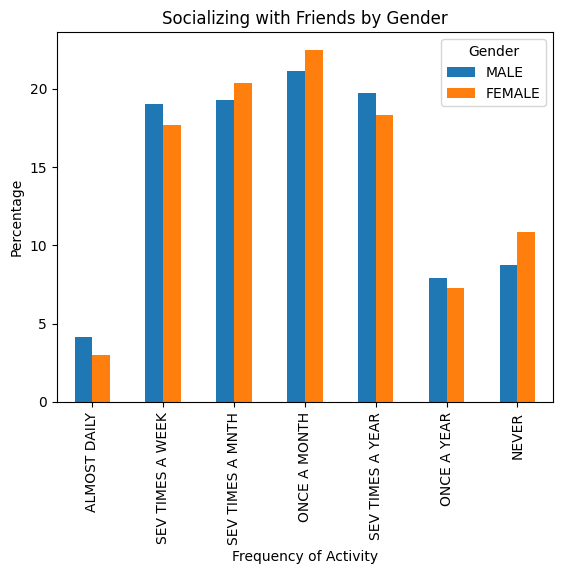

<Figure size 1000x600 with 0 Axes>

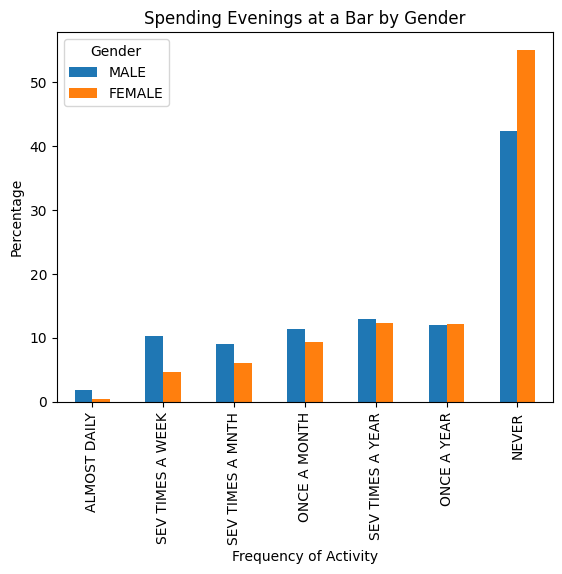

In [40]:
#  evening with friends
data_friends = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "ALMOST DAILY": [860, 668, 1528],
    "SEV TIMES A WEEK": [3941, 3967, 7908],
    "SEV TIMES A MNTH": [3988, 4562, 8551],
    "ONCE A MONTH": [4369, 5037, 9406],
    "SEV TIMES A YEAR": [4079, 4106, 8186],
    "ONCE A YEAR": [1642, 1628, 3270],
    "NEVER": [1813, 2434, 4247],
    "Total": [20693, 22403, 43096]
}

crosstab_evening_socialization = pd.DataFrame(data_friends)

# BAR
data_bar = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "ALMOST DAILY": [386, 101, 487],
    "SEV TIMES A WEEK": [2118, 1050, 3168],
    "SEV TIMES A MNTH": [1866, 1361, 3227],
    "ONCE A MONTH": [2361, 2088, 4449],
    "SEV TIMES A YEAR": [2671, 2747, 5418],
    "ONCE A YEAR": [2495, 2718, 5214],
    "NEVER": [8766, 12328, 21094],
    "Total": [20663, 22394, 43057]
}

df_socbar = pd.DataFrame(data_bar)

def compute_percentage(df):
    df_percentage = df.copy()
    for col in df.columns[1:-1]:  
        df_percentage[col] = (df[col] / df["Total"]) * 100
    return df_percentage

df_friends_pct = compute_percentage(crosstab_evening_socialization)
df_bar_pct = compute_percentage(df_socbar)

def plot_graphs(df, title):
    plt.figure(figsize=(10, 6))
    df_filtered = df[df["SEX (respondents sex)"] != "Total"] 
    df_filtered.set_index("SEX (respondents sex)").drop(columns=["Total"]).T.plot(kind="bar")
    plt.title(title)
    plt.ylabel("Percentage")
    plt.xlabel("Frequency of Activity")
    plt.legend(title="Gender")
    plt.show()

plot_graphs(df_friends_pct, "Socializing with Friends by Gender")
plot_graphs(df_bar_pct, "Spending Evenings at a Bar by Gender")

Now I want to look at the number of close friends and see if men really have less friends than women. I'll look at romantic partners too.

<Figure size 1000x600 with 0 Axes>

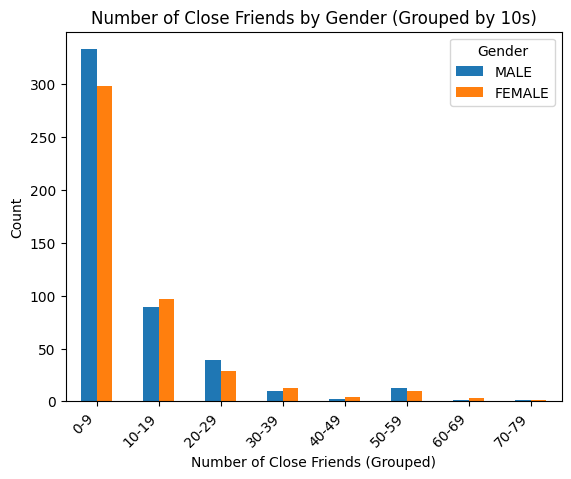

In [41]:
data = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "No other close friends": [107, 76, 183],
    "1": [35, 25, 60],
    "2": [46, 55, 100],
    "3": [65, 68, 133],
    "4": [57, 38, 96],
    "5": [64, 58, 122],
    "6": [34, 24, 58],
    "7": [8, 9, 16],
    "8": [19, 16, 35],
    "9": [5, 5, 10],
    "10": [57, 58, 115],
    "11": [0, 0, 0],
    "12": [14, 10, 24],
    "14": [1, 0, 1],
    "15": [15, 27, 42],
    "16": [0, 1, 1],
    "18": [2, 1, 3],
    "19": [0, 0, 0],
    "20": [21, 18, 38],
    "21": [1, 0, 1],
    "24": [0, 2, 2],
    "25": [17, 9, 26],
    "30": [6, 11, 17],
    "35": [4, 2, 6],
    "40": [2, 1, 4],
    "45": [0, 3, 3],
    "50": [13, 10, 23],
    "60": [1, 3, 5],
    "70": [0, 1, 1],
    "75": [1, 0, 1],
    "Total": [597, 532, 1129]
}

close_friends = pd.DataFrame(data)

import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame for number of close friends
data_friends_count = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "No other close friends": [107, 76, 183],
    "1": [35, 25, 60],
    "2": [46, 55, 100],
    "3": [65, 68, 133],
    "4": [57, 38, 96],
    "5": [64, 58, 122],
    "6": [34, 24, 58],
    "7": [8, 9, 16],
    "8": [19, 16, 35],
    "9": [5, 5, 10],
    "10": [57, 58, 115],
    "11": [0, 0, 0],
    "12": [14, 10, 24],
    "14": [1, 0, 1],
    "15": [15, 27, 42],
    "16": [0, 1, 1],
    "18": [2, 1, 3],
    "19": [0, 0, 0],
    "20": [21, 18, 38],
    "21": [1, 0, 1],
    "24": [0, 2, 2],
    "25": [17, 9, 26],
    "30": [6, 11, 17],
    "35": [4, 2, 6],
    "40": [2, 1, 4],
    "45": [0, 3, 3],
    "50": [13, 10, 23],
    "60": [1, 3, 5],
    "70": [0, 1, 1],
    "75": [1, 0, 1],
    "Total": [597, 532, 1129]
}

df_close_friends = pd.DataFrame(data_friends_count)

df_filtered = df_close_friends[df_close_friends["SEX (respondents sex)"] != "Total"]

df_filtered = df_filtered.set_index("SEX (respondents sex)").astype(int)

bins = list(range(0, 81, 10))  # Creating bins from 0 to 80 in 10s
bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

grouped_data = {}
for gender in df_filtered.index:
    grouped_values = []
    for i in range(len(bins) - 1):
        col_range = [str(num) for num in range(bins[i], bins[i+1]) if str(num) in df_filtered.columns]
        grouped_values.append(df_filtered.loc[gender, col_range].sum())
    grouped_data[gender] = grouped_values


df_grouped = pd.DataFrame(grouped_data, index=bin_labels)

# Plot 
plt.figure(figsize=(10, 6))
df_grouped.plot(kind="bar")
plt.title("Number of Close Friends by Gender (Grouped by 10s)")
plt.ylabel("Count")
plt.xlabel("Number of Close Friends (Grouped)")
plt.legend(title="Gender")
plt.xticks(rotation=45, ha="right")
plt.show()


In [43]:
# Romantic partners
data = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "YES": [250, 257, 507],
    "NO": [267, 382, 649],
    "HAS SAME GENDER PARTNER": [2, 1, 3],
    "Total": [519, 640, 1159]
}

df_romance = pd.DataFrame(data)

df_romance.head()

,SEX (respondents sex),YES,NO,HAS SAME GENDER PARTNER,Total
0,MALE,250,267,2,519
1,FEMALE,257,382,1,640
2,Total,507,649,3,1159


<Figure size 1000x600 with 0 Axes>

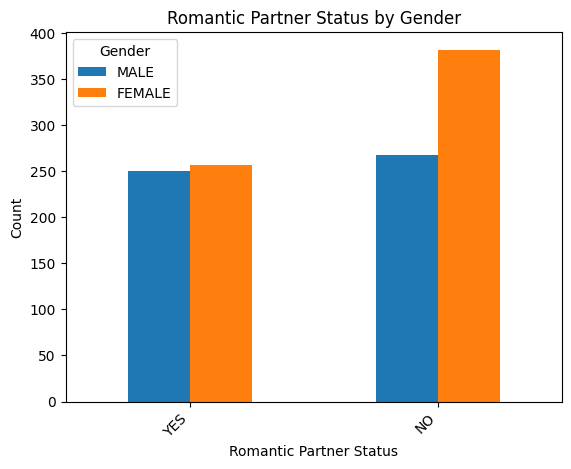

In [44]:
df_romance_filtered = df_romance[df_romance["SEX (respondents sex)"] != "Total"].drop(columns=["HAS SAME GENDER PARTNER"])

df_romance_transposed = df_romance_filtered.set_index("SEX (respondents sex)").drop(columns=["Total"]).T

# Plot
plt.figure(figsize=(10, 6))
df_romance_transposed.plot(kind="bar")
plt.title("Romantic Partner Status by Gender")
plt.ylabel("Count")
plt.xlabel("Romantic Partner Status")
plt.legend(title="Gender")
plt.xticks(rotation=45, ha="right")
plt.show()

Next, I'll look at the frequency of which men and women call and visit their best friends. I think effort put into friendships through quality time and interaction is an important factor of this whole loneliness problem, because if people are in contact with a close friend, they may not be as lonely as someone who is not. It also can say something about the support men and women give to their prospective friends, and the level of support they get back.

In [33]:
# how many times you call your best friend
data = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "Daily": [69, 105, 173],
    "At least several times a week": [145, 131, 275],
    "At least once a week": [132, 111, 243],
    "At least once a month": [80, 95, 175],
    "Several times a year": [47, 34, 81],
    "Less often": [39, 13, 52],
    "Never": [29, 17, 46],
    "Total": [541, 505, 1046]
}

bf_call = pd.DataFrame(data)

bf_call.head()


,SEX (respondents sex),Daily,At least several times a week,At least once a week,At least once a month,Several times a year,Less often,Never,Total
0,MALE,69,145,132,80,47,39,29,541
1,FEMALE,105,131,111,95,34,13,17,505
2,Total,173,275,243,175,81,52,46,1046


In [34]:
# how many times you visit your best friend
data = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "He or she lives in the same household as I do": [18, 11, 29],
    "Daily": [58, 44, 102],
    "At least several times a week": [119, 95, 214],
    "At least once a week": [133, 123, 256],
    "At least once a month": [90, 102, 192],
    "Several times a year": [82, 92, 174],
    "Less often": [55, 42, 97],
    "Never": [4, 7, 11],
    "Total": [559, 516, 1075]
}

bstvisit = pd.DataFrame(data)
bstvisit.head()


,SEX (respondents sex),He or she lives in the same household as I do,Daily,At least several times a week,At least once a week,At least once a month,Several times a year,Less often,Never,Total
0,MALE,18,58,119,133,90,82,55,4,559
1,FEMALE,11,44,95,123,102,92,42,7,516
2,Total,29,102,214,256,192,174,97,11,1075


<Figure size 1000x600 with 0 Axes>

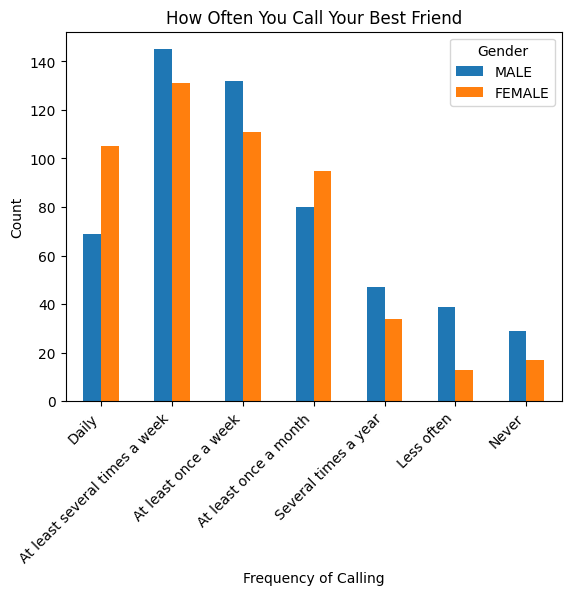

<Figure size 1000x600 with 0 Axes>

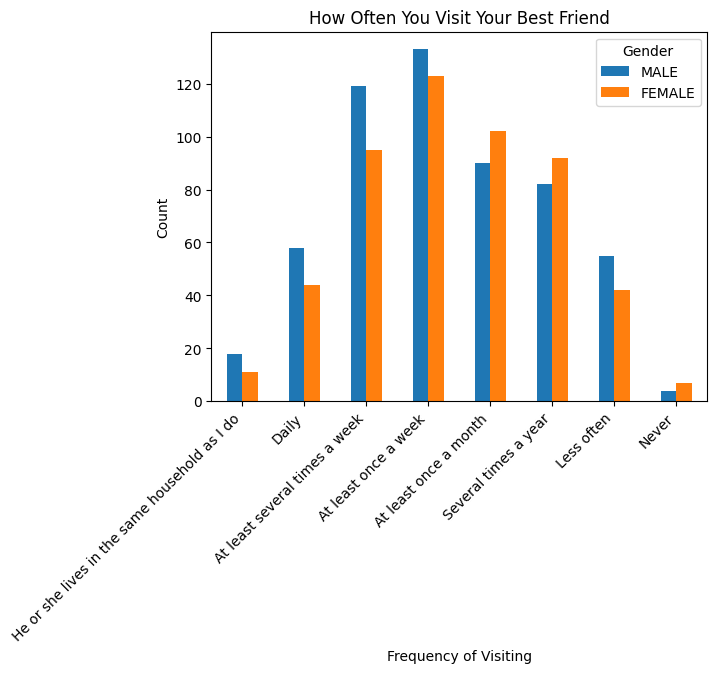

In [42]:
# bar charts
data_bf_call = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "Daily": [69, 105, 173],
    "At least several times a week": [145, 131, 275],
    "At least once a week": [132, 111, 243],
    "At least once a month": [80, 95, 175],
    "Several times a year": [47, 34, 81],
    "Less often": [39, 13, 52],
    "Never": [29, 17, 46],
    "Total": [541, 505, 1046]
}

df_bf_call = pd.DataFrame(data_bf_call)

data_bst_visit = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "He or she lives in the same household as I do": [18, 11, 29],
    "Daily": [58, 44, 102],
    "At least several times a week": [119, 95, 214],
    "At least once a week": [133, 123, 256],
    "At least once a month": [90, 102, 192],
    "Several times a year": [82, 92, 174],
    "Less often": [55, 42, 97],
    "Never": [4, 7, 11],
    "Total": [559, 516, 1075]
}

df_bst_visit = pd.DataFrame(data_bst_visit)

def plot_barchart(df, title, xlabel):
    df_filtered = df[df["SEX (respondents sex)"] != "Total"]  # Remove "Total" row
    df_transposed = df_filtered.set_index("SEX (respondents sex)").drop(columns=["Total"]).T

    plt.figure(figsize=(10, 6))
    df_transposed.plot(kind="bar")
    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel(xlabel)
    plt.legend(title="Gender")
    plt.xticks(rotation=45, ha="right")
    plt.show()

plot_barchart(df_bf_call, "How Often You Call Your Best Friend", "Frequency of Calling")
plot_barchart(df_bst_visit, "How Often You Visit Your Best Friend", "Frequency of Visiting")

In the same vein as calling and visiting, I'll look at the number of respondents who contribute to a needy friend. 

<Figure size 1000x600 with 0 Axes>

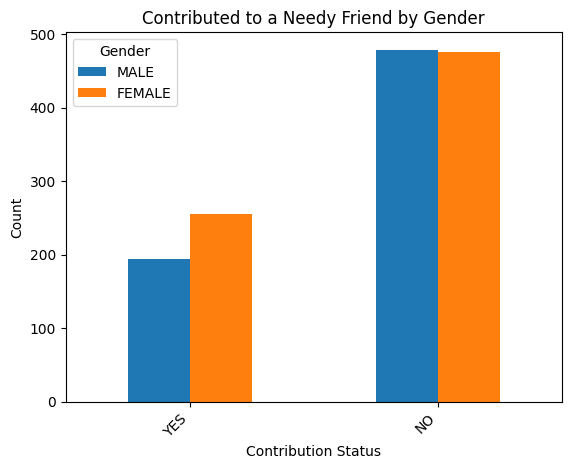

In [45]:
data_needy_frd = {
    "SEX (respondents sex)": ["MALE", "FEMALE", "Total"],
    "YES": [194, 255, 449],
    "NO": [479, 476, 955],
    "Total": [673, 731, 1404]
}

df_needy_frd = pd.DataFrame(data_needy_frd)

df_needy_frd_filtered = df_needy_frd[df_needy_frd["SEX (respondents sex)"] != "Total"]

df_needy_frd_transposed = df_needy_frd_filtered.set_index("SEX (respondents sex)").drop(columns=["Total"]).T

plt.figure(figsize=(10, 6))
df_needy_frd_transposed.plot(kind="bar")
plt.title("Contributed to a Needy Friend by Gender")
plt.ylabel("Count")
plt.xlabel("Contribution Status")
plt.legend(title="Gender")
plt.xticks(rotation=45, ha="right")
plt.show()